UNSUPERVISED MACHINE LEARNING; DIMENSIONALITY REDUCTION

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components= 2, random_state=11)

In [3]:
reduced_data= tsne.fit_transform(digits.data)

In [4]:
reduced_data.shape

(1797, 2)

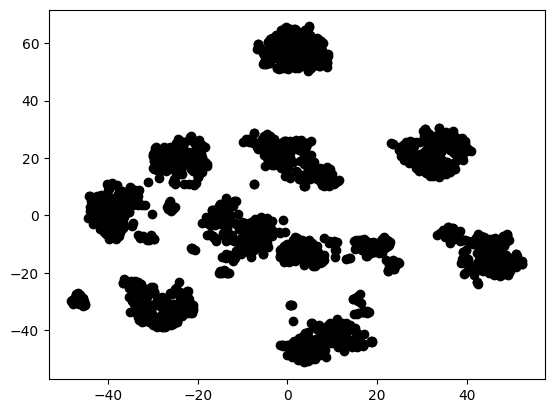

In [5]:
#visualizing the reduced data
import matplotlib.pyplot as plt
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                   c= 'black')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5780\2396384546.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c= digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))


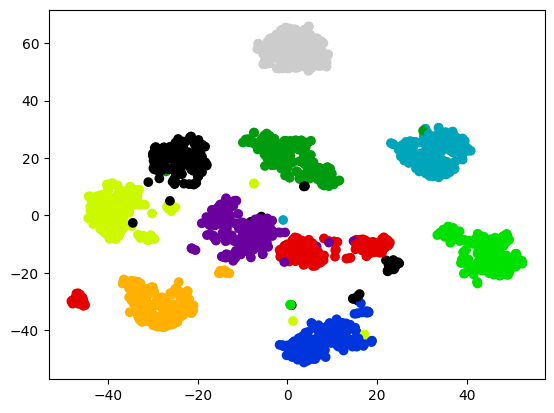

In [6]:
#visualizing with different colors for each digit
#visualizing the reduced data
import matplotlib.pyplot as plt
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                   c= digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

KMEANS CLUSTERING WITH THE IRIS DATASET

In [7]:
#LOADING THE IRIS DATASET
from sklearn.datasets import load_iris
iris= load_iris()

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
iris.data.shape

(150, 4)

In [10]:
iris.target.shape

(150,)

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
#EXPLORING THE IRIS DATASET
import pandas as pd
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', None)

In [13]:
#create a dataframe containing the data array's contents , 
#using the contents of the feature names array as the column names:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [14]:
#CREATE A COLUMN CONTAINING EACH SAMPLES SPECIE NAME
iris_df['species']= [iris.target_names[i] for i in iris.target]

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
pd.set_option('display.precision', 2)

In [17]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [18]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [19]:
#VISUALIZATION
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style('whitegrid')


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ADMIN\AppData\Roaming\Python\Python311\sit

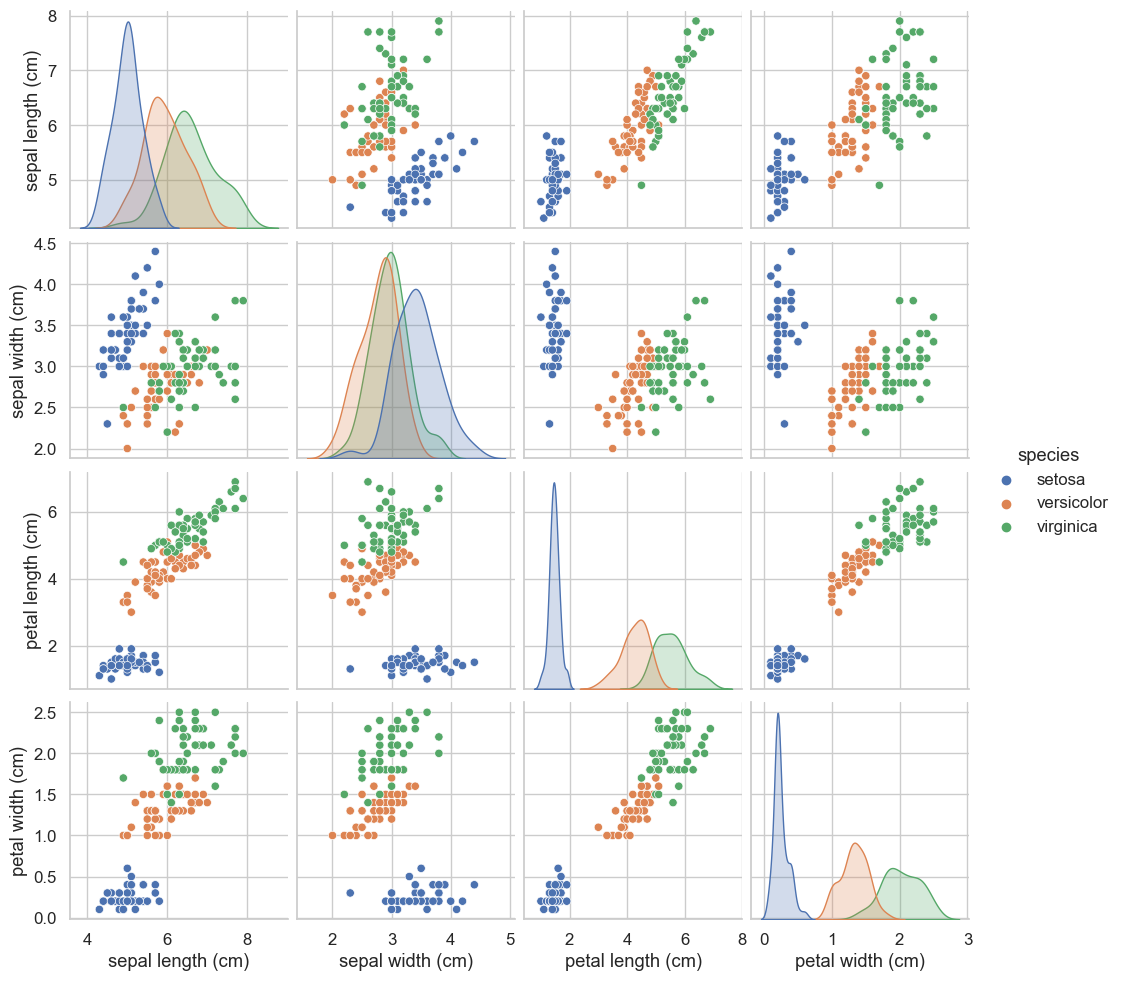

In [20]:
grid = sns.pairplot(data=iris_df,vars=iris_df.columns[0:4],
                    hue='species')

In [21]:
#USING A K-MEANS ESTIMATOR: Place each sample in the dataset in a cluster
from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters= 3, random_state=11)

In [22]:
#fitting/training the data
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=11)

In [23]:
print(kmeans.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print(kmeans.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
print(kmeans.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


In [26]:
"""this confirms the pair plot, showing that iris setosa belongs in a class by itself but there is some confusion 
when classifying iris versicolor and virginica"""


'this confirms the pair plot, showing that iris setosa belongs in a class by itself but there is some confusion \nwhen classifying iris versicolor and virginica'

In [27]:
#DIMENSIONALITY REDUCTION WITH PRINCIPAL COMPONENT ANALYSIS
#WE WILL USE THE PCA ESTIMATOR FROM THE SKLEARN DECOMPOSITION MODULE.
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=11)

In [28]:
#transforming the iris dataset into two dimesnions
pca.fit(iris.data)


PCA(n_components=2, random_state=11)

In [29]:
iris_pca= pca.transform(iris.data)

In [30]:
iris_pca.shape

(150, 2)

In [31]:
#VISUALIZING THE REDUCED DATA
#USE A SCATTERPLOT  TO DISPLAY THE DATA, 
#TRANSFORM REDUCED DATA INTO A DF AND ADD A SPECIES COLUMN

In [32]:
iris_pca_df = pd.DataFrame(iris_pca,
                           columns=['component1', 'component2'])

In [33]:
iris_pca_df['species']=iris_df.species

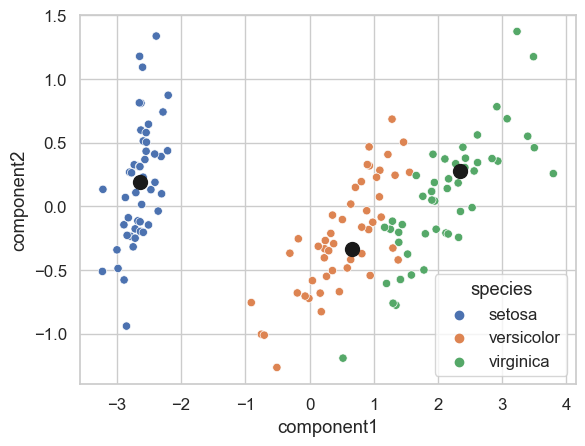

In [34]:
axes = sns.scatterplot(data=iris_pca_df, x='component1', 
     y='component2', hue='species', legend='brief') 

iris_centers = pca.transform(kmeans.cluster_centers_)

import matplotlib.pyplot as plt

dots = plt.scatter(iris_centers[:,0], iris_centers[:,1], 
                    s=100, c='k')

In [35]:
#choosing the best clustering among kmeans, bdscan, meanshift, spectralclustering, and agglomerative clustering estimators
from sklearn.cluster import DBSCAN, MeanShift,\
SpectralClustering, AgglomerativeClustering

In [36]:
estimators= {
    'KMeans': kmeans,
    'DBSCAN' : DBSCAN(),
    'MeanShift' : MeanShift(),
    'SpectralClustering' : SpectralClustering(n_clusters=3),
    'AgglomerativeClustering' : AgglomerativeClustering(n_clusters=3)
}

In [37]:
import numpy as np
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0,101,50):
        labels, counts = np.unique(
            estimator.labels_[i:i+50], return_counts = True)
        print(f'{i}-{i+50}:')
        for label, count in zip(labels, counts):
            print(f' label= {label}, count={count}')


KMeans:
0-50:
 label= 0, count=50
50-100:
 label= 1, count=47
 label= 2, count=3
100-150:
 label= 1, count=14
 label= 2, count=36

DBSCAN:
0-50:
 label= -1, count=1
 label= 0, count=49
50-100:
 label= -1, count=6
 label= 1, count=44
100-150:
 label= -1, count=10
 label= 1, count=40

MeanShift:
0-50:
 label= 1, count=50
50-100:
 label= 0, count=49
 label= 1, count=1
100-150:
 label= 0, count=50

SpectralClustering:
0-50:
 label= 0, count=50
50-100:
 label= 2, count=50
100-150:
 label= 1, count=35
 label= 2, count=15

AgglomerativeClustering:
0-50:
 label= 1, count=50
50-100:
 label= 0, count=49
 label= 2, count=1
100-150:
 label= 0, count=15
 label= 2, count=35
